In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
cd /content/drive/MyDrive/OST & SM Project

/content/drive/MyDrive/OST & SM Project


In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
%matplotlib inline

# Read data

In [85]:
# df = pd.read_excel('/content/SWaT_dataset_v2.xlsx', skiprows=[0])
df = pd.read_excel('SWaT_dataset_v2.xlsx', skiprows=[0])
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,timestamp,value,value,value,value,value,value,value,value,value,...,value,value,value,value,value,value,value,value,value,value
1,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [86]:
df.shape

(14997, 78)

In [87]:
df.describe()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
count,14997,14997,14997.0000,14997,14997,14997,14997,14997.000000,14997.000000,14997.000000,...,14997,14997,14997,14997,14997,14997,14997,14997,14997,14997
unique,14997,311,4494.0000,4,3,3,2,302.000000,1485.000000,1392.000000,...,3,2,2,2,2,2,2,3,2,2
top,timestamp,0,821.0499,1,2,1,1,144.033585,9.393618,240.194824,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
freq,1,12379,236.0000,12416,14072,9385,14996,895.000000,59.000000,176.000000,...,13231,14996,14996,14996,14996,14996,14996,14766,14996,14996


In [88]:
df = df.drop(labels=0, axis=0)

In [89]:
df.reset_index(inplace=True, drop=True)

In [90]:
df.head()

,GMT +0,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,...,LSH 601,LSH 602,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status
0,2019-07-20T04:30:00Z,0,729.8658,1,3,2,1,142.527557,9.293002,198.077423,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
1,2019-07-20T04:30:01Z,0,729.434,1,3,2,1,142.527557,9.293002,198.385025,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
2,2019-07-20T04:30:02.004013Z,0,729.12,1,3,2,1,142.527557,9.293002,198.4363,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
3,2019-07-20T04:30:03.004013Z,0,728.6882,1,3,2,1,142.527557,9.289157,198.667,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1
4,2019-07-20T04:30:04Z,0,727.7069,1,3,2,1,142.527557,9.289157,198.89772,...,Active,Active,Inactive,Inactive,Inactive,Active,2,1,1,1


In [91]:
df.shape

(14996, 78)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 78 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GMT +0       14996 non-null  object
 1   FIT 101      14996 non-null  object
 2   LIT 101      14996 non-null  object
 3   MV 101       14996 non-null  object
 4   P1_STATE     14996 non-null  object
 5   P101 Status  14996 non-null  object
 6   P102 Status  14996 non-null  object
 7   AIT 201      14996 non-null  object
 8   AIT 202      14996 non-null  object
 9   AIT 203      14996 non-null  object
 10  FIT 201      14996 non-null  object
 11  LS 201       14996 non-null  object
 12  LS 202       14996 non-null  object
 13  LSL 203      14996 non-null  object
 14  LSLL 203     14996 non-null  object
 15  MV201        14996 non-null  object
 16  P2_STATE     14996 non-null  object
 17  P201 Status  14996 non-null  object
 18  P202 Status  14996 non-null  object
 19  P203 Status  14996 non-nu

# Exploratory Data Analysis

In [93]:
print(df['GMT +0'].unique())

['2019-07-20T04:30:00Z' '2019-07-20T04:30:01Z'
 '2019-07-20T04:30:02.004013Z' ... '2019-07-20T08:39:57.0050048Z'
 '2019-07-20T08:39:58.0050048Z' '2019-07-20T08:39:59.004013Z']


In [96]:
df['Date'] = pd.to_datetime(df['GMT +0'], format='%Y-%m-%dT%H:%M:%S')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 79 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   GMT +0       14996 non-null  object             
 1   FIT 101      14996 non-null  object             
 2   LIT 101      14996 non-null  object             
 3   MV 101       14996 non-null  object             
 4   P1_STATE     14996 non-null  object             
 5   P101 Status  14996 non-null  object             
 6   P102 Status  14996 non-null  object             
 7   AIT 201      14996 non-null  object             
 8   AIT 202      14996 non-null  object             
 9   AIT 203      14996 non-null  object             
 10  FIT 201      14996 non-null  object             
 11  LS 201       14996 non-null  object             
 12  LS 202       14996 non-null  object             
 13  LSL 203      14996 non-null  object             
 14  LSLL 203     14996 non

In [98]:
GMT_coln = df['GMT +0'].copy()

In [99]:
del df['GMT +0']

In [100]:
# Define conditions for labeling as an attack based on the information provided
# Adjust these conditions based on the specific time intervals for each attack

attack_conditions = [
    ((df['Date'] >= '2019-07-20 07:08:46') & (df['Date'] <= '2019-07-20 07:10:31')),
    ((df['Date'] >= '2019-07-20 07:15:00') & (df['Date'] <= '2019-07-20 07:19:32')),
    ((df['Date'] >= '2019-07-20 07:26:57') & (df['Date'] <= '2019-07-20 07:30:48')),
    ((df['Date'] >= '2019-07-20 07:38:50') & (df['Date'] <= '2019-07-20 07:46:20')),
    ((df['Date'] >= '2019-07-20 07:54:00') & (df['Date'] <= '2019-07-20 07:56:00')),
    ((df['Date'] >= '2019-07-20 08:02:56') & (df['Date'] <= '2019-07-20 08:16:18')),
]


# Label the corresponding rows as 'Attack'
#df.loc[df['GMT+0_S'].isin(attack_conditions), 'Attack_label'] = 'Attack'
df.loc[:, 'Attack_label'] = np.where(np.any(attack_conditions, axis=0), 'Attack', 'Normal')



# Display the updated DataFrame
print(df[['Date', 'Attack_label']])




                                     Date Attack_label
0               2019-07-20 04:30:00+00:00       Normal
1               2019-07-20 04:30:01+00:00       Normal
2        2019-07-20 04:30:02.004013+00:00       Normal
3        2019-07-20 04:30:03.004013+00:00       Normal
4               2019-07-20 04:30:04+00:00       Normal
...                                   ...          ...
14991    2019-07-20 08:39:55.001007+00:00       Normal
14992 2019-07-20 08:39:56.005004800+00:00       Normal
14993 2019-07-20 08:39:57.005004800+00:00       Normal
14994 2019-07-20 08:39:58.005004800+00:00       Normal
14995    2019-07-20 08:39:59.004013+00:00       Normal

[14996 rows x 2 columns]


In [101]:
df['Attack_label'].value_counts()

Normal    13015
Attack     1981
Name: Attack_label, dtype: int64

In [102]:
attack_rows = df[df['Attack_label'] == 'Attack']
attack_rows


,FIT 101,LIT 101,MV 101,P1_STATE,P101 Status,P102 Status,AIT 201,AIT 202,AIT 203,FIT 201,...,LSH 603,LSL 601,LSL 602,LSL 603,P6 STATE,P601 Status,P602 Status,P603 Status,Date,Attack_label
9522,0,820.775146,1,2,1,1,144.257889,9.084723,242.1943,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 07:08:46.005004800+00:00,Attack
9523,0,820.6574,1,2,1,1,144.129715,9.084723,242.1943,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 07:08:47.005004800+00:00,Attack
9524,0,820.5789,1,2,1,1,144.129715,9.086645,242.1943,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 07:08:48.002014100+00:00,Attack
9525,0,820.5004,1,2,1,1,143.873367,9.086645,242.1943,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 07:08:49.005004800+00:00,Attack
9526,0,820.814453,1,2,1,1,143.873367,9.09017,242.1943,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 07:08:50.004013+00:00,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13569,0,819.6761,1,2,1,1,128.492691,8.839592,233.5555,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 08:16:13.002014100+00:00,Attack
13570,0,820.304138,1,2,1,1,128.492691,8.839592,233.5555,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 08:16:14.005004800+00:00,Attack
13571,0,819.9901,1,2,1,1,128.492691,8.839592,233.6324,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 08:16:15.002014100+00:00,Attack
13572,0,820.107849,1,2,1,1,128.492691,8.839592,233.6324,0.000513,...,Inactive,Inactive,Inactive,Active,2,1,1,1,2019-07-20 08:16:16.005004800+00:00,Attack


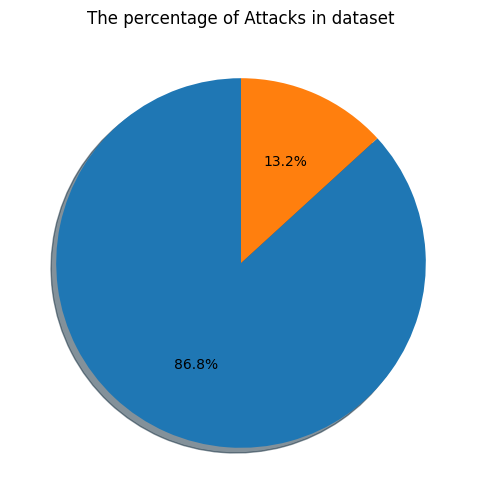

In [103]:
sizes = [dict(df.Attack_label.value_counts())['Normal'], dict(df.Attack_label.value_counts())['Attack']]
plt.figure(figsize = (8,6))
plt.pie(sizes,  autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('The percentage of Attacks in dataset')
plt.show()

In [104]:
df.isnull().sum()

FIT 101         0
LIT 101         0
MV 101          0
P1_STATE        0
P101 Status     0
               ..
P601 Status     0
P602 Status     0
P603 Status     0
Date            0
Attack_label    0
Length: 79, dtype: int64

## Handling categorical features

In [105]:
def convert_numeric_columns(df):
    for col in df.columns:
       if col !='Date':
          unique_values = df[col].unique()

          # Check if the unique value is a number
          if not np.isnan(pd.to_numeric(unique_values, errors='coerce')).any():
              # Convert the column to integer if all unique values are integers
              if all(np.char.isdigit(pd.to_numeric(unique_values, errors='coerce').astype(str))):
                  df[col] = pd.to_numeric(df[col], errors='coerce').astype(int)
              else:
                  # Otherwise, convert the column to float
                  df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

    return df


print("Original DataFrame:")
print(df)

df = convert_numeric_columns(df)

print("\nDataFrame after conversion:")
print(df)

print("\nData Types:")
print(df.dtypes)


Original DataFrame:
        FIT 101     LIT 101 MV 101 P1_STATE P101 Status P102 Status  \
0             0    729.8658      1        3           2           1   
1             0     729.434      1        3           2           1   
2             0      729.12      1        3           2           1   
3             0    728.6882      1        3           2           1   
4             0    727.7069      1        3           2           1   
...         ...         ...    ...      ...         ...         ...   
14991  4.200429  491.169769      2        2           2           1   
14992  4.253915  491.405273      2        2           2           1   
14993  4.303558    492.3081      2        2           2           1   
14994  4.323736    492.4651      2        2           2           1   
14995  4.323736  492.896881      2        2           2           1   

          AIT 201   AIT 202     AIT 203   FIT 201  ...   LSH 603   LSL 601  \
0      142.527557  9.293002  198.077423  2.335437

In [106]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
object_cols = df.select_dtypes(include=['object']).columns
print('Numeric Columns: ')
print(numeric_cols, '\n')
print('Object Columns: ')
print(object_cols, '\n')
print('Number of Numeric Features: ', len(numeric_cols))
print('Number of Object Features: ', len(object_cols))

Numeric Columns: 
Index(['FIT 101', 'LIT 101', 'MV 101', 'P1_STATE', 'P101 Status',
       'P102 Status', 'AIT 201', 'AIT 202', 'AIT 203', 'FIT 201', 'MV201',
       'P2_STATE', 'P201 Status', 'P202 Status', 'P203 Status', 'P204 Status',
       'P205 Status', 'P206 Status', 'P207 Status', 'P208 Status', 'AIT 301',
       'AIT 302', 'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 301',
       'MV 302', 'MV 303', 'MV 304', 'P3_STATE', 'P301 Status', 'P302 Status',
       'AIT 401', 'AIT 402', 'FIT 401', 'LIT 401', 'P4_STATE', 'P401 Status',
       'P402 Status', 'P403 Status', 'P404 Status', 'UV401', 'AIT 501',
       'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502', 'FIT 503',
       'FIT 504', 'MV 501', 'MV 502', 'MV 503', 'MV 504', 'P5_STATE',
       'P501 Status', 'P502 Status', 'PIT 501', 'PIT 502', 'PIT 503',
       'FIT 601', 'P6 STATE', 'P601 Status', 'P602 Status', 'P603 Status'],
      dtype='object') 

Object Columns: 
Index(['LS 201', 'LS 202', 'LSL 203', 'LSLL 203', 'L

In [107]:
df1 = df.copy()

In [108]:
df1.drop(['Date'], axis=1, inplace=True, errors='ignore')
# object_cols.drop(['Date'])

In [109]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 78 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIT 101       14996 non-null  float64
 1   LIT 101       14996 non-null  float64
 2   MV 101        14996 non-null  int64  
 3   P1_STATE      14996 non-null  int64  
 4   P101 Status   14996 non-null  int64  
 5   P102 Status   14996 non-null  int64  
 6   AIT 201       14996 non-null  float64
 7   AIT 202       14996 non-null  float64
 8   AIT 203       14996 non-null  float64
 9   FIT 201       14996 non-null  float64
 10  LS 201        14996 non-null  object 
 11  LS 202        14996 non-null  object 
 12  LSL 203       14996 non-null  object 
 13  LSLL 203      14996 non-null  object 
 14  MV201         14996 non-null  int64  
 15  P2_STATE      14996 non-null  int64  
 16  P201 Status   14996 non-null  int64  
 17  P202 Status   14996 non-null  int64  
 18  P203 Status   14996 non-nu

In [110]:
# Convert object columns to dummies

def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

for ob_col in object_cols:
  if ob_col !='Attack_label':
    encode_text_dummy(df1, ob_col)

In [111]:
df1.shape

(14996, 79)

### Split Data

In [112]:
target = 'Attack_label'

X = df1.drop(['Attack_label'], axis=1)
y = df1[target]

In [113]:
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
X_train.shape

(11996, 78)

In [115]:
X_test.shape

(3000, 78)

## Feature Selection using Lasso L1 penalty
- Logistic regression is used as model

In [116]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [117]:
# linear models benefit from feature scaling
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [118]:
# here I will do the model fitting and feature selection all together in one line of code
# first I specify the Logistic Regression model, and I make sure I select the Lasso (l1) penalty.
# Then I use the selectFromModel class from sklearn, which will select the features which coefficients are non-zero

sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [119]:
# this command let's me visualise the index of the features that were selected

sel_.get_support()

array([ True,  True,  True, False,  True, False, False,  True,  True,
        True,  True, False, False, False,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False, False, False, False, False,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False])

In [120]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 78
selected features: 37


In [121]:
# print Feature names
selected_feat

Index(['FIT 101', 'LIT 101', 'MV 101', 'P101 Status', 'AIT 202', 'AIT 203',
       'FIT 201', 'MV201', 'P203 Status', 'P205 Status', 'AIT 301', 'AIT 302',
       'AIT 303', 'DPIT 301', 'FIT 301', 'LIT 301', 'MV 302', 'MV 303',
       'MV 304', 'P3_STATE', 'P301 Status', 'AIT 402', 'FIT 401', 'LIT 401',
       'P401 Status', 'AIT 502', 'AIT 503', 'AIT 504', 'FIT 501', 'FIT 502',
       'FIT 504', 'MV 501', 'PIT 502', 'PIT 503', 'P601 Status',
       'LSH 601-Active', 'LSH 601-Inactive'],
      dtype='object')

In [131]:
df_selected = df1[selected_feat].copy()
df_selected

,FIT 101,LIT 101,MV 101,P101 Status,AIT 202,AIT 203,FIT 201,MV201,P203 Status,P205 Status,...,AIT 504,FIT 501,FIT 502,FIT 504,MV 501,PIT 502,PIT 503,P601 Status,LSH 601-Active,LSH 601-Inactive
0,0.000000,729.865800,1,2,9.293002,198.077423,2.335437,2,2,2,...,46.065113,0.781594,0.310362,0.213432,2,2.963509,119.921173,1,1,0
1,0.000000,729.434000,1,2,9.293002,198.385025,2.335437,2,2,2,...,45.757500,0.782235,0.315102,0.212984,2,2.963509,119.921173,1,1,0
2,0.000000,729.120000,1,2,9.293002,198.436300,2.335437,2,2,2,...,45.603690,0.782235,0.317023,0.212984,2,2.963509,119.921173,1,1,0
3,0.000000,728.688200,1,2,9.289157,198.667000,2.335437,2,2,2,...,45.603690,0.783133,0.308057,0.212792,2,2.963509,119.921173,1,1,0
4,0.000000,727.706900,1,2,9.289157,198.897720,2.335437,2,2,2,...,45.219173,0.783773,0.303446,0.214009,2,2.963509,119.921173,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,4.200429,491.169769,2,2,9.319918,257.703156,2.316086,2,2,2,...,24.839785,0.809536,0.366594,0.209909,2,2.498959,113.784927,1,1,0
14992,4.253915,491.405273,2,2,9.317354,257.703156,2.314292,2,2,2,...,24.839785,0.809536,0.374023,0.209909,2,2.498959,113.784927,1,1,0
14993,4.303558,492.308100,2,2,9.317354,257.703156,2.313651,2,2,2,...,24.839785,0.809536,0.369156,0.209909,2,2.498959,113.784927,1,1,0
14994,4.323736,492.465100,2,2,9.316713,257.703156,2.313651,2,2,2,...,24.839785,0.809536,0.357115,0.209909,2,2.498959,113.784927,1,1,0


In [132]:
df_selected.shape

(14996, 37)

In [133]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIT 101           14996 non-null  float64
 1   LIT 101           14996 non-null  float64
 2   MV 101            14996 non-null  int64  
 3   P101 Status       14996 non-null  int64  
 4   AIT 202           14996 non-null  float64
 5   AIT 203           14996 non-null  float64
 6   FIT 201           14996 non-null  float64
 7   MV201             14996 non-null  int64  
 8   P203 Status       14996 non-null  int64  
 9   P205 Status       14996 non-null  int64  
 10  AIT 301           14996 non-null  float64
 11  AIT 302           14996 non-null  float64
 12  AIT 303           14996 non-null  float64
 13  DPIT 301          14996 non-null  float64
 14  FIT 301           14996 non-null  float64
 15  LIT 301           14996 non-null  float64
 16  MV 302            14996 non-null  int64 

In [134]:
df_selected.insert(0, "GMT +0", GMT_coln)
df_selected['Attack_label'] = df['Attack_label']

In [135]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMT +0            14996 non-null  object 
 1   FIT 101           14996 non-null  float64
 2   LIT 101           14996 non-null  float64
 3   MV 101            14996 non-null  int64  
 4   P101 Status       14996 non-null  int64  
 5   AIT 202           14996 non-null  float64
 6   AIT 203           14996 non-null  float64
 7   FIT 201           14996 non-null  float64
 8   MV201             14996 non-null  int64  
 9   P203 Status       14996 non-null  int64  
 10  P205 Status       14996 non-null  int64  
 11  AIT 301           14996 non-null  float64
 12  AIT 302           14996 non-null  float64
 13  AIT 303           14996 non-null  float64
 14  DPIT 301          14996 non-null  float64
 15  FIT 301           14996 non-null  float64
 16  LIT 301           14996 non-null  float6

In [137]:
# Save the new DataFrame to an Excel file
excel_file_path = '/content/drive/MyDrive/OST & SM Project/Swat_with_FS.xlsx'

# Use the to_excel method to save the DataFrame to an Excel file
df_selected.to_excel(excel_file_path, index=False)



In [139]:
df_selected.head()

,GMT +0,FIT 101,LIT 101,MV 101,P101 Status,AIT 202,AIT 203,FIT 201,MV201,P203 Status,...,FIT 501,FIT 502,FIT 504,MV 501,PIT 502,PIT 503,P601 Status,LSH 601-Active,LSH 601-Inactive,Attack_label
0,2019-07-20T04:30:00Z,0.0,729.8658,1,2,9.293002,198.077423,2.335437,2,2,...,0.781594,0.310362,0.213432,2,2.963509,119.921173,1,1,0,Normal
1,2019-07-20T04:30:01Z,0.0,729.4340,1,2,9.293002,198.385025,2.335437,2,2,...,0.782235,0.315102,0.212984,2,2.963509,119.921173,1,1,0,Normal
2,2019-07-20T04:30:02.004013Z,0.0,729.1200,1,2,9.293002,198.436300,2.335437,2,2,...,0.782235,0.317023,0.212984,2,2.963509,119.921173,1,1,0,Normal
3,2019-07-20T04:30:03.004013Z,0.0,728.6882,1,2,9.289157,198.667000,2.335437,2,2,...,0.783133,0.308057,0.212792,2,2.963509,119.921173,1,1,0,Normal
4,2019-07-20T04:30:04Z,0.0,727.7069,1,2,9.289157,198.897720,2.335437,2,2,...,0.783773,0.303446,0.214009,2,2.963509,119.921173,1,1,0,Normal


In [138]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14996 entries, 0 to 14995
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GMT +0            14996 non-null  object 
 1   FIT 101           14996 non-null  float64
 2   LIT 101           14996 non-null  float64
 3   MV 101            14996 non-null  int64  
 4   P101 Status       14996 non-null  int64  
 5   AIT 202           14996 non-null  float64
 6   AIT 203           14996 non-null  float64
 7   FIT 201           14996 non-null  float64
 8   MV201             14996 non-null  int64  
 9   P203 Status       14996 non-null  int64  
 10  P205 Status       14996 non-null  int64  
 11  AIT 301           14996 non-null  float64
 12  AIT 302           14996 non-null  float64
 13  AIT 303           14996 non-null  float64
 14  DPIT 301          14996 non-null  float64
 15  FIT 301           14996 non-null  float64
 16  LIT 301           14996 non-null  float6